##**Semantic segmentation of aerial imagery**

###**About Dataset**

####**Context**
Humans in the Loop is publishing an open access dataset annotated for a joint project with the Mohammed Bin Rashid Space Center in Dubai, the UAE.

####**Content**
The dataset consists of aerial imagery of Dubai obtained by MBRSC satellites and annotated with pixel-wise semantic segmentation in 6 classes. The total volume of the dataset is 72 images grouped into 6 larger tiles. The classes are:

Building: #3C1098

Land (unpaved area): #8429F6

Road: #6EC1E4

Vegetation: #FEDD3A

Water: #E2A929

Unlabeled: #9B9B9B


###**Acknowledgements**
The images were segmented by the trainees of the Roia Foundation in Syria.

In [1]:
!pip install patchify

In [109]:
# Install necessary dependencies
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
!ls -lah '/content/drive/MyDrive/Datasets/Semantic segmentation dataset.zip'

-rw------- 1 root root 30M Sep 12 07:33 '/content/drive/MyDrive/Datasets/Semantic segmentation dataset.zip'


In [4]:
#unzip a .zip file in Python
!unzip -q "/content/drive/MyDrive/Datasets/Semantic segmentation dataset.zip" -d "/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/"


replace /content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 1/images/image_part_001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [71]:
!ls -lah '/content/drive/MyDrive/Datasets/semantic_segmentation_dataset'

total 4.0K
drwx------ 10 root root 4.0K Sep 12 14:47 'Semantic segmentation dataset'


In [72]:
!ls -lah '/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset'

total 33K
-rw------- 1 root root  548 May 29  2020  classes.json
drwx------ 4 root root 4.0K Sep 12 14:47 'Tile 1'
drwx------ 4 root root 4.0K Sep 12 14:47 'Tile 2'
drwx------ 4 root root 4.0K Sep 12 14:47 'Tile 3'
drwx------ 4 root root 4.0K Sep 12 14:47 'Tile 4'
drwx------ 4 root root 4.0K Sep 12 14:47 'Tile 5'
drwx------ 4 root root 4.0K Sep 12 14:47 'Tile 6'
drwx------ 4 root root 4.0K Sep 12 14:47 'Tile 7'
drwx------ 4 root root 4.0K Sep 12 14:47 'Tile 8'


In [73]:
dataset_root_folder = '/content/drive/MyDrive/Datasets/semantic_segmentation_dataset'

In [74]:
dataset_name = "Semantic segmentation dataset"  # matches the folder name created during unzip

In [75]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder)):
  dir_name = path.split(os.path.sep)[-1]
  print(dir_name)

semantic_segmentation_dataset
Semantic segmentation dataset
Tile 1
images
masks
Tile 2
images
masks
Tile 3
images
masks
Tile 4
images
masks
Tile 5
images
masks
Tile 6
images
masks
Tile 7
images
masks
Tile 8
images
masks


In [76]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 1/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 2/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 3/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 4/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 5/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 6/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 7/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 8/masks


In [77]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.jpg')): # '.png
        #print(image_name)
        a = True

/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 1/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 2/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 3/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 4/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 5/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 6/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 7/masks
/content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 8/masks


In [78]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
    dir_name = os.path.basename(path)
    if dir_name == 'masks':   # or 'images' depending on what you want
        images = os.listdir(path)
        print("📂 Found masks folder at:", path)
        for i, image_name in enumerate(images):
            if image_name.endswith('.png'):   # adjust to '.jpg' if needed
                print(f"Mask {i+1}: {image_name}")

📂 Found masks folder at: /content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 1/masks
Mask 1: image_part_003.png
Mask 2: image_part_004.png
Mask 3: image_part_001.png
Mask 4: image_part_005.png
Mask 5: image_part_007.png
Mask 6: image_part_002.png
Mask 7: image_part_008.png
Mask 8: image_part_009.png
Mask 9: image_part_006.png
📂 Found masks folder at: /content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 2/masks
Mask 1: image_part_003.png
Mask 2: image_part_006.png
Mask 3: image_part_007.png
Mask 4: image_part_001.png
Mask 5: image_part_008.png
Mask 6: image_part_009.png
Mask 7: image_part_002.png
Mask 8: image_part_005.png
Mask 9: image_part_004.png
📂 Found masks folder at: /content/drive/MyDrive/Datasets/semantic_segmentation_dataset/Semantic segmentation dataset/Tile 3/masks
Mask 1: image_part_005.png
Mask 2: image_part_006.png
Mask 3: image_part_007.png
Mask 4: image_part_001.png
Mask 5: image_pa

In [79]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 3/images/image_part_002.jpg',1)

In [80]:
image.shape

(658, 682, 3)

In [15]:
image_dataset = []
image_extensions = "jpg" # png
image_type = "masks" # "images"
for tile_id in range(1,8):
  for image_id in range(1,20):
     image = cv2 .imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.{image_extensions}',1)
     if image is not None:
      pass # Added a pass statement to avoid incomplete input error after commenting out print
      #print(image.shape)


In [16]:
image_patch_size = 256

In [17]:
#image.shape

In [18]:
if image is not None:
  image.shape[0]//image_patch_size
else:
  print("Image is None, cannot access shape")

Image is None, cannot access shape


In [19]:
image_dataset = []
image_extensions = "jpg" # png
image_type = "images" # "masks"
for tile_id in range(1,8):
  for image_id in range(1,20):
     image = cv2 .imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.{image_extensions}',1)
     if image is not None:
      #print(image.shape)
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      #print("{} --- {} - {}".format(image.shape, size_x, size_y))

In [20]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 3/images/image_part_002.jpg',1)

In [21]:
print(type(image))

<class 'numpy.ndarray'>


In [22]:
type(Image.fromarray(image))

PIL.Image.Image

In [23]:
image_dataset = []
image_extensions = "jpg" # png
image_type = "images" # "masks"
for tile_id in range(1,8):
  for image_id in range(1,20):
     image = cv2 .imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.{image_extensions}',1)
     if image is not None:
      #print(image.shape)
      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      #print("{} --- {} - {}".format(image.shape, size_x, size_y))
      image = Image.fromarray(image)
      image = image.crop((0,0, size_x, size_y))
      #print("({},  {})".format(image.size[0],image.size[1]))

In [24]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 3/images/image_part_002.jpg',1)

In [25]:
image_patch_size = 256

Number of patches= [(Image size - Patch size) / Step] + 1

In [26]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
#image_patches

In [27]:
len(image_patches)

2

In [28]:
image_dataset = []
image_extensions = "jpg" # png
image_type = "images" # "masks"
for tile_id in range(1,8):
  for image_id in range(1,20):
     image = cv2 .imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.{image_extensions}',1)
     if image is not None:
      #print(image.shape)

      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      #print("{} --- {} - {}".format(image.shape, size_x, size_y))

      image = Image.fromarray(image)
      image = image.crop((0,0, size_x, size_y))
      #print("({},  {})".format(image.size[0],image.size[1]))

      image = np.array(image)  ## Convert back to numpy array
      patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
      #print(len(patched_images))

In [29]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 3/images/image_part_002.jpg',1)

In [30]:
image_patch_size = 256

In [31]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
#image_patches

In [32]:
print(image_patches.shape)

(2, 2, 1, 256, 256, 3)


In [33]:
print(image_patches.shape[0])

2


In [34]:
print(image_patches.shape[1])

2


In [35]:
image_dataset = []
image_extensions = "jpg" # png
image_type = "images" # "masks"
for tile_id in range(1,8):
  for image_id in range(1,20):
     image = cv2 .imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.{image_extensions}',1)
     if image is not None:
      #print(image.shape)

      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      #print("{} --- {} - {}".format(image.shape, size_x, size_y))

      image = Image.fromarray(image)
      image = image.crop((0,0, size_x, size_y))
      #print("({},  {})".format(image.size[0],image.size[1]))

      image = np.array(image)  ## Convert back to numpy array
      patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
      #print(len(patched_images))

      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          individual_patched_image = patched_images[i,j,:,:]
          #print(individual_patched_image.shape)

In [36]:
minmaxscaler = MinMaxScaler()

In [37]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 3/images/image_part_002.jpg',1)

In [38]:
image_patch_size = 256

In [39]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
#image_patches

In [40]:
print(image_patches.shape)

(2, 2, 1, 256, 256, 3)


#### **1️⃣ Shape of patchify output**

If you patchify a 2D image (say 512×512) into 256×256 patches, you’ll get something like:

**image_patches.shape = (2, 2, 256, 256)**

- First two numbers → number of patches in each dimension (rows × cols)
- Last two numbers → height × width of each patch


#### **2️⃣ Meaning of [0, 0, :, :]**
- The first 0 → Selects the first patch row (top row of patches).
- The second 0 → Selects the first patch column (left column of patches).
- The :, : → Selects all pixels in that patch (256×256).

So:
👉 image_patches[0,0,:,:] means “give me the patch in the top-left corner of the original image.”

In [41]:
image_patches[0,0,:,:]

array([[[[ 14,  14,  14],
         [ 13,  13,  13],
         [ 13,  13,  13],
         ...,
         [ 12,  23,  15],
         [  9,  20,  12],
         [ 21,  32,  29]],

        [[  7,   7,   7],
         [  7,   7,   7],
         [  7,   7,   7],
         ...,
         [ 16,  24,  17],
         [ 13,  24,  16],
         [ 19,  30,  27]],

        [[  7,   7,   7],
         [  6,   6,   6],
         [  7,   7,   7],
         ...,
         [  9,  16,  11],
         [  9,  20,  12],
         [  7,  18,  15]],

        ...,

        [[ 19,  21,  21],
         [ 21,  23,  23],
         [ 16,  18,  18],
         ...,
         [140, 127, 119],
         [201, 188, 180],
         [162, 149, 141]],

        [[  2,   4,   4],
         [  7,   9,   9],
         [  4,   6,   6],
         ...,
         [140, 126, 114],
         [212, 198, 186],
         [168, 152, 140]],

        [[ 12,  14,  14],
         [ 14,  16,  16],
         [  7,   9,   9],
         ...,
         [154, 142, 132],
        

####**🔎 Step 1: Extract the patch**
**image_x = image_patches[0,0,:,:]**

- Takes the top-left patch from your image patches (as we explained earlier).
- Let’s assume this patch is 256 × 256 × 3 if it’s RGB, or 256 × 256 if grayscale.

####**🔎 Step 2: Reshape for scaler**
**image_x.reshape(-1, image_x.shape[-1])**


- If image_x is RGB: shape = (256, 256, 3).
- Reshape turns it into (65536, 3) (a list of all pixels, each pixel has 3 values for R, G, B).

⚡ Why? → MinMaxScaler works with 2D arrays of shape (samples, features).
Here:
- samples = number of pixels
- features = channels (3 for RGB, 1 for grayscale)



####**🔎 Step 3: Apply MinMaxScaler**
**minmaxscaler.fit_transform(...)**
- MinMaxScaler scales all values between 0 and 1.


####**🔎 Step 4: Reshape back**
**.reshape(image_x.shape)**
- Converts (65536, 3) back to (256, 256, 3) (original patch shape).
- So now image_y is the normalized patch, values between 0 and 1.

####**✅ In summary:**
This code takes a patch → flattens it into pixels → normalizes pixel values with MinMaxScaler → reshapes back into an image patch.

In [42]:
image_x = image_patches[0,0,:,:]

#MinMaxScaler
minmaxscaler = MinMaxScaler()
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [43]:
image_y.shape

(1, 256, 256, 3)

In [44]:
image_y[0].shape

(256, 256, 3)

In [45]:
image_dataset = []
image_extensions = "jpg" # png
image_type = "images" # "masks"
for tile_id in range(1,8):
  for image_id in range(1,20):
     image = cv2 .imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/images/image_part_00{image_id}.{image_extensions}',1)
     if image is not None:
      #print(image.shape)

      size_x = (image.shape[1]//image_patch_size)*image_patch_size
      size_y = (image.shape[0]//image_patch_size)*image_patch_size
      #print("{} --- {} - {}".format(image.shape, size_x, size_y))

      image = Image.fromarray(image)
      image = image.crop((0,0, size_x, size_y))
      #print("({},  {})".format(image.size[0],image.size[1]))

      image = np.array(image)  ## Convert back to numpy array
      patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
      #(len(patched_images))

      for i in range(patched_images.shape[0]):
        for j in range(patched_images.shape[1]):
          individual_patched_image = patched_images[i,j,:,:]

          #print(individual_patched_image.shape)
          individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
          individual_patched_image = individual_patched_image[0]
          #print(individual_patched_image.shape)

          image_dataset.append(individual_patched_image)

In [46]:
len(image_dataset)

945

###**Processing Satellie Mask Images**
We will use method and process for mask images what is done for images

In [47]:
image_dataset = []
mask_dataset = []

for image_type in ['images', 'masks']:
    if image_type == 'images':
        image_extension = 'jpg'
    elif image_type == 'masks':
        image_extension = 'png'

    for tile_id in range(1, 8):
        for image_id in range(1, 20):
            image = cv2.imread(
                f"{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}",
                1
            )
            if image is not None:
                # print(image.shape)

                size_x = (image.shape[1] // image_patch_size) * image_patch_size
                size_y = (image.shape[0] // image_patch_size) * image_patch_size
                # print("{} --- {} - {}".format(image.shape, size_x, size_y))

                image = Image.fromarray(image)
                image = image.crop((0, 0, size_x, size_y))
                # print("({},  {})".format(image.size[0], image.size[1]))

                image = np.array(image)  ## Convert back to numpy array
                patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
                # print(len(patched_images))

                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        individual_patched_image = patched_images[i, j, :, :]

                        # print(individual_patched_image.shape)
                        individual_patched_image = minmaxscaler.fit_transform(
                            individual_patched_image.reshape(-1, individual_patched_image.shape[-1])
                        ).reshape(individual_patched_image.shape)
                        # print(individual_patched_image.shape)

                        # image_dataset.append(individual_patched_image)

                        if image_type == 'images':
                            image_dataset.append(individual_patched_image)
                        elif image_type == 'masks':
                            mask_dataset.append(individual_patched_image)


In [48]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


**To process the mask, with the opencv said whenever you are to use imread method, imge must BGR but ours is RGB**

In [49]:
# Initialize empty lists to store the image patches and mask patches
image_dataset = []
mask_dataset = []

# Loop through both datasets: images and masks
for image_type in ['images' , 'masks']:

  # Use correct file extension for each type
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
    image_extension = 'png'

  # Loop through 7 tiles (Tile 1, Tile 2, ... Tile 7)
  for tile_id in range(1,8):

    # Loop through 19 images inside each tile (image_part_001 ... image_part_019)
    for image_id in range(1,20):

      # Read the image/mask from the dataset path
      image = cv2.imread(
          f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',
          1
      )

      # If image exists (skip if not found)
      if image is not None:

        # Convert mask from BGR → RGB (OpenCV loads in BGR by default)
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Debug: print original shape
        #print(image.shape)

        # Ensure dimensions are divisible by patch size (avoid leftover pixels)
        size_x = (image.shape[1] // image_patch_size) * image_patch_size
        size_y = (image.shape[0] // image_patch_size) * image_patch_size

        # Debug: print cropped size vs original
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))

        # Convert to PIL image to crop easily
        image = Image.fromarray(image)

        # Crop the image to make sure it fits patch size perfectly
        image = image.crop((0, 0, size_x, size_y))

        # Debug: print cropped image size
        #print("({},  {})".format(image.size[0], image.size[1]))

        # Convert back to numpy array for patchify
        image = np.array(image)

        # Break image into non-overlapping patches of size (patch_size, patch_size, 3)
        patched_images = patchify(
            image,
            (image_patch_size, image_patch_size, 3),
            step=image_patch_size
        )

        # Debug: number of patches
        #print(len(patched_images))

        # Loop over all patches in the current image
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):

            if image_type == 'images':
              # Extract a single patch
              individual_patched_image = patched_images[i, j, :, :]

              # Debug: shape before normalization
              #print(individual_patched_image.shape)

              # Normalize the patch to [0,1] using MinMaxScaler
              individual_patched_image = minmaxscaler.fit_transform(
                  individual_patched_image.reshape(-1, individual_patched_image.shape[-1])
              ).reshape(individual_patched_image.shape)

              # Patchify gives extra dimension, keep only [H, W, C]
              individual_patched_image = individual_patched_image[0]

              # Debug: shape after processing
              #print(individual_patched_image.shape)

              # Save image patch into dataset
              image_dataset.append(individual_patched_image)

            elif image_type == 'masks':
              # Extract a single mask patch
              individual_patched_mask = patched_images[i, j, :, :]

              # Reduce to [H, W, C]
              individual_patched_mask = individual_patched_mask[0]

              # Save mask patch into dataset
              mask_dataset.append(individual_patched_mask)


In [50]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [51]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [52]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [53]:
type(image_dataset[0])

numpy.ndarray

In [54]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

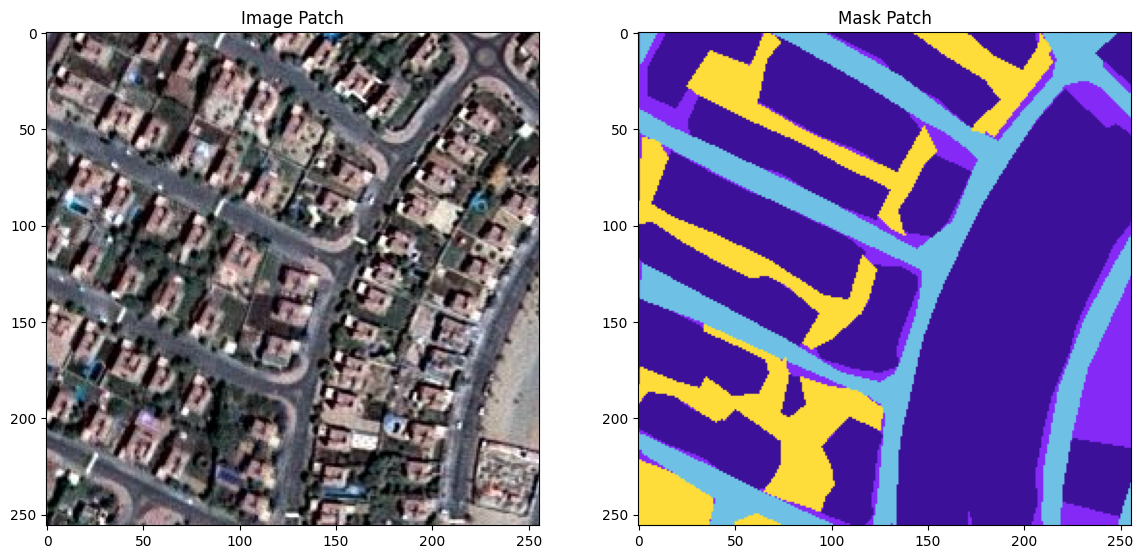

In [84]:
# Pick a random index from the image dataset
# (so we can visualize a random image-mask pair)
random_image_id = random.randint(0, len(image_dataset))

# Create a figure with a custom size
plt.figure(figsize=(14, 8))

# Show the image patch on the left (subplot 1 of 2)
plt.subplot(121)   # 1 row, 2 columns, position 1
plt.imshow(image_dataset[random_image_id])
plt.title("Image Patch")  # Add title for clarity

# Show the corresponding mask patch on the right (subplot 2 of 2)
plt.subplot(122)   # 1 row, 2 columns, position 2
plt.imshow(mask_dataset[random_image_id])
plt.title("Mask Patch")  # Add title for clarity

# Render the plots
plt.show()


In [87]:
# ================================
# Convert HEX color codes into RGB arrays for each segmentation class
# ================================

# --- Building class ---
class_building = '#3C1098'   # HEX color code for building
class_building = class_building.lstrip('#')   # Remove the '#' symbol → "3C1098"
class_building = np.array(
    tuple(
        int(class_building[i:i+2], 16)   # Take 2 characters at a time (e.g. "3C"), convert from HEX (base 16) → Decimal
        for i in (0, 2, 4)               # Split into chunks: "3C", "10", "98"
    )
)   # Result → [60, 16, 152] in RGB format
print("Building RGB:", class_building)


# --- Land class ---
class_land = '#8429F6'   # HEX color code for land
class_land = class_land.lstrip('#')   # Remove '#' → "8429F6"
class_land = np.array(
    tuple(int(class_land[i:i+2], 16) for i in (0, 2, 4))  # Convert: "84"=132, "29"=41, "F6"=246
)
print("Land RGB:", class_land)   # [132, 41, 246]


# --- Road class ---
class_road = '#6EC1E4'   # HEX color code for roads
class_road = class_road.lstrip('#')   # Remove '#' → "6EC1E4"
class_road = np.array(
    tuple(int(class_road[i:i+2], 16) for i in (0, 2, 4))  # Convert: "6E"=110, "C1"=193, "E4"=228
)
print("Road RGB:", class_road)   # [110, 193, 228]


# --- Vegetation class ---
class_vegetation = '#FEDD3A'   # HEX color code for vegetation
class_vegetation = class_vegetation.lstrip('#')   # Remove '#' → "FEDD3A"
class_vegetation = np.array(
    tuple(int(class_vegetation[i:i+2], 16) for i in (0, 2, 4))  # Convert: "FE"=254, "DD"=221, "3A"=58
)
print("Vegetation RGB:", class_vegetation)   # [254, 221, 58]


# --- Water class ---
class_water = '#E2A929'   # HEX color code for water
class_water = class_water.lstrip('#')   # Remove '#' → "E2A929"
class_water = np.array(
    tuple(int(class_water[i:i+2], 16) for i in (0, 2, 4))  # Convert: "E2"=226, "A9"=169, "29"=41
)
print("Water RGB:", class_water)   # [226, 169, 41]


# --- Unlabeled/Other class ---
class_unlabeled = '#9B9B9B'   # HEX color code for unlabeled areas
class_unlabeled = class_unlabeled.lstrip('#')   # Remove '#' → "9B9B9B"
class_unlabeled = np.array(
    tuple(int(class_unlabeled[i:i+2], 16) for i in (0, 2, 4))  # Convert: "9B"=155, "9B"=155, "9B"=155
)
print("Unlabeled RGB:", class_unlabeled)   # [155, 155, 155]


Building RGB: [ 60  16 152]
Land RGB: [132  41 246]
Road RGB: [110 193 228]
Vegetation RGB: [254 221  58]
Water RGB: [226 169  41]
Unlabeled RGB: [155 155 155]


In [88]:
mask_dataset.shape[0]

945

In [89]:
label = individual_patched_mask

In [90]:
def rgb_to_label(label):
    """
    Convert an RGB mask image (where each class is represented by a unique RGB color)
    into a 2D label mask (where each pixel is represented by a class index).
    """

    # Initialize a new array with the same shape as the input mask
    # dtype=np.uint8 ensures values are integers from 0–255
    label_segment = np.zeros(label.shape, dtype=np.uint8)

    # Compare every pixel in the mask with each class color
    # np.all(..., axis=-1) → checks if all 3 RGB values match at the same pixel
    # If match → assign a class index

    label_segment[np.all(label == class_water, axis=-1)] = 0       # Water → Class 0
    label_segment[np.all(label == class_land, axis=-1)] = 1        # Land → Class 1
    label_segment[np.all(label == class_road, axis=-1)] = 2        # Road → Class 2
    label_segment[np.all(label == class_building, axis=-1)] = 3    # Building → Class 3
    label_segment[np.all(label == class_vegetation, axis=-1)] = 4  # Vegetation → Class 4
    label_segment[np.all(label == class_unlabeled, axis=-1)] = 5   # Unlabeled → Class 5

    # At this stage, label_segment is still 3D (H, W, 3) but with repeated values
    # Example: a pixel classified as "Water" will have [0, 0, 0]

    # Reduce it to 2D (H, W) by taking just one channel (all are the same anyway)
    label_segment = label_segment[:, :, 0]

    # Return the final 2D label mask (H, W) where pixel values = class indices
    return label_segment


In [91]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [92]:
print(len(labels))

945


In [93]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
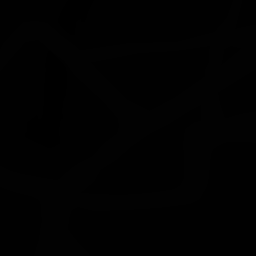

In [94]:
labels[3]

In [95]:
labels = np.expand_dims(labels, axis=3)

In [96]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [97]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [98]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


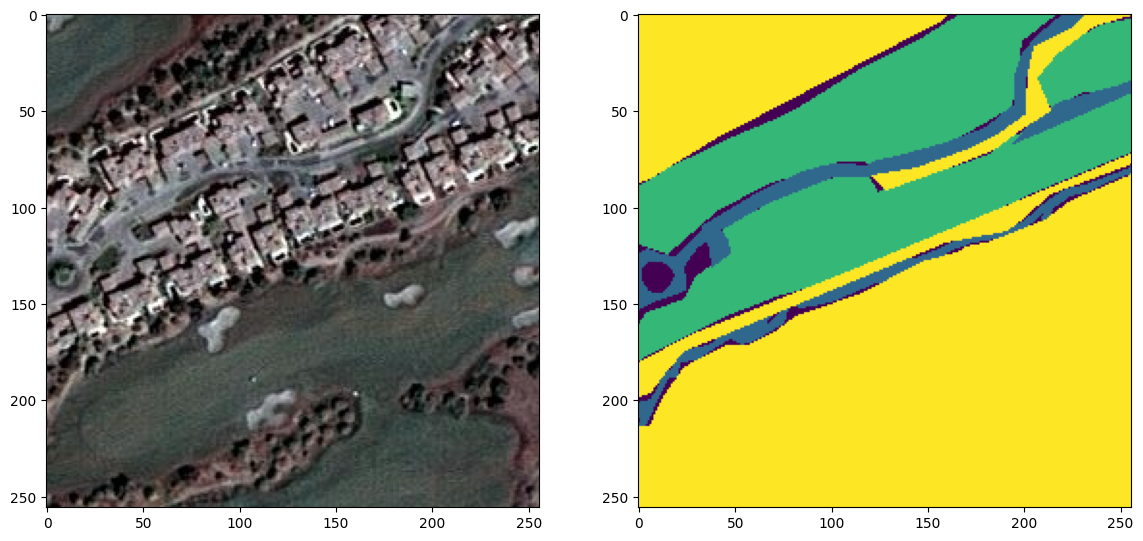

In [102]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [103]:
total_classes = len(np.unique(labels))
print("Total classes: ", total_classes)

Total classes:  6


In [106]:
label_categorical_dataset= to_categorical(labels, num_classes=total_classes)
label_categorical_dataset.shape

(945, 256, 256, 6)

In [108]:
master_training_dataset = image_dataset
master_training_dataset.shape

(945, 256, 256, 3)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, label_categorical_dataset, test_size=0.2, random_state=42)

In [111]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(756, 256, 256, 3)
(756, 256, 256, 6)
(189, 256, 256, 3)
(189, 256, 256, 6)


In [114]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [115]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


###**Simple Analogy**

In [100]:
# Creating a small 3x3 RGB mask and demonstrating step-by-step conversion to class IDs.
import numpy as np

# helper: convert HEX string to RGB numpy array
def hex_to_rgb(hexstr):
    h = hexstr.lstrip('#')
    return np.array(tuple(int(h[i:i+2], 16) for i in (0, 2, 4)), dtype=np.uint8)

# define class colors (same as the project)
class_building    = hex_to_rgb('#3C1098')  # -> [ 60, 16,152]
class_land        = hex_to_rgb('#8429F6')  # -> [132, 41,246]
class_road        = hex_to_rgb('#6EC1E4')  # -> [110,193,228]
class_vegetation  = hex_to_rgb('#FEDD3A')  # -> [254,221, 58]
class_water       = hex_to_rgb('#E2A929')  # -> [226,169, 41]
class_unlabeled   = hex_to_rgb('#9B9B9B')  # -> [155,155,155]

# build a 3x3 RGB mask (H=3, W=3, C=3)
# layout (classes) for clarity:
# row0: water, land, road
# row1: building, vegetation, unlabeled
# row2: water, road, building
mask = np.zeros((3, 3, 3), dtype=np.uint8)
mask[0,0,:] = class_water
mask[0,1,:] = class_land
mask[0,2,:] = class_road
mask[1,0,:] = class_building
mask[1,1,:] = class_vegetation
mask[1,2,:] = class_unlabeled
mask[2,0,:] = class_water
mask[2,1,:] = class_road
mask[2,2,:] = class_building

# Print the mask in a readable form (each pixel as RGB tuple)
print("=== 3x3 RGB mask (each pixel shown as (R,G,B)) ===")
for i in range(mask.shape[0]):
    row_vals = [tuple(mask[i,j].tolist()) for j in range(mask.shape[1])]
    print(row_vals)
print()

# A verbose conversion that shows the label array after each class assignment
def rgb_to_label_verbose(label):
    # Start with a clearly "unassigned" value (255) for demonstration
    label_segment = np.full(label.shape, 255, dtype=np.uint8)
    print("Initial label_segment (255 = unassigned):")
    print(label_segment[:,:,0])
    print()

    # Assign class indices step by step and print intermediate results
    label_segment[np.all(label == class_water, axis=-1)] = 0
    print("After assigning Water -> 0:")
    print(label_segment[:,:,0])
    print()

    label_segment[np.all(label == class_land, axis=-1)] = 1
    print("After assigning Land -> 1:")
    print(label_segment[:,:,0])
    print()

    label_segment[np.all(label == class_road, axis=-1)] = 2
    print("After assigning Road -> 2:")
    print(label_segment[:,:,0])
    print()

    label_segment[np.all(label == class_building, axis=-1)] = 3
    print("After assigning Building -> 3:")
    print(label_segment[:,:,0])
    print()

    label_segment[np.all(label == class_vegetation, axis=-1)] = 4
    print("After assigning Vegetation -> 4:")
    print(label_segment[:,:,0])
    print()

    label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
    print("After assigning Unlabeled -> 5:")
    print(label_segment[:,:,0])
    print()

    # Return the final 2D label map (H, W)
    return label_segment[:,:,0]

# Run verbose demonstration
verbose_result = rgb_to_label_verbose(mask)

# Now run the original-style conversion (as in your function)
def rgb_to_label_original(label):
    label_segment = np.zeros(label.shape, dtype=np.uint8)
    label_segment[np.all(label == class_water, axis=-1)] = 0
    label_segment[np.all(label == class_land, axis=-1)] = 1
    label_segment[np.all(label == class_road, axis=-1)] = 2
    label_segment[np.all(label == class_building, axis=-1)] = 3
    label_segment[np.all(label == class_vegetation, axis=-1)] = 4
    label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
    return label_segment[:,:,0]

original_result = rgb_to_label_original(mask)

# Show final results and confirm both match
print("Verbose final 2D label map:")
print(verbose_result)
print()

print("Original-style final 2D label map (from your function):")
print(original_result)
print()

print("Do the two results match (all elements equal)?", np.array_equal(verbose_result, original_result))



=== 3x3 RGB mask (each pixel shown as (R,G,B)) ===
[(226, 169, 41), (132, 41, 246), (110, 193, 228)]
[(60, 16, 152), (254, 221, 58), (155, 155, 155)]
[(226, 169, 41), (110, 193, 228), (60, 16, 152)]

Initial label_segment (255 = unassigned):
[[255 255 255]
 [255 255 255]
 [255 255 255]]

After assigning Water -> 0:
[[  0 255 255]
 [255 255 255]
 [  0 255 255]]

After assigning Land -> 1:
[[  0   1 255]
 [255 255 255]
 [  0 255 255]]

After assigning Road -> 2:
[[  0   1   2]
 [255 255 255]
 [  0   2 255]]

After assigning Building -> 3:
[[  0   1   2]
 [  3 255 255]
 [  0   2   3]]

After assigning Vegetation -> 4:
[[  0   1   2]
 [  3   4 255]
 [  0   2   3]]

After assigning Unlabeled -> 5:
[[0 1 2]
 [3 4 5]
 [0 2 3]]

Verbose final 2D label map:
[[0 1 2]
 [3 4 5]
 [0 2 3]]

Original-style final 2D label map (from your function):
[[0 1 2]
 [3 4 5]
 [0 2 3]]

Do the two results match (all elements equal)? True


In [101]:
import numpy as np

# ==============================
# 1. Helper function: Convert HEX to RGB
# ==============================
def hex_to_rgb(hexstr):
    # HEX colors look like "#3C1098" (for purple).
    # Remove the "#" and split into 3 pairs: ("3C","10","98").
    # Each pair is converted from base-16 to base-10.
    h = hexstr.lstrip('#')
    return np.array(tuple(int(h[i:i+2], 16) for i in (0, 2, 4)), dtype=np.uint8)

# ==============================
# 2. Define colors for each class
# ==============================
class_building    = hex_to_rgb('#3C1098')   # Building -> purple [ 60, 16,152]
class_land        = hex_to_rgb('#8429F6')   # Land -> violet [132, 41,246]
class_road        = hex_to_rgb('#6EC1E4')   # Road -> light blue [110,193,228]
class_vegetation  = hex_to_rgb('#FEDD3A')   # Vegetation -> yellow [254,221, 58]
class_water       = hex_to_rgb('#E2A929')   # Water -> brownish [226,169, 41]
class_unlabeled   = hex_to_rgb('#9B9B9B')   # Unlabeled -> gray [155,155,155]

# ==============================
# 3. Build a toy 3x3 mask
# ==============================
# Think of it as a 3x3 tic-tac-toe board. Each cell has a color.
mask = np.zeros((3, 3, 3), dtype=np.uint8)

# Row 0
mask[0,0,:] = class_water
mask[0,1,:] = class_land
mask[0,2,:] = class_road

# Row 1
mask[1,0,:] = class_building
mask[1,1,:] = class_vegetation
mask[1,2,:] = class_unlabeled

# Row 2
mask[2,0,:] = class_water
mask[2,1,:] = class_road
mask[2,2,:] = class_building

print("=== 3x3 RGB mask (each pixel shown as (R,G,B)) ===")
for i in range(mask.shape[0]):
    row_vals = [tuple(mask[i,j].tolist()) for j in range(mask.shape[1])]
    print(row_vals)
print()

# ==============================
# 4. Verbose conversion function
# ==============================
def rgb_to_label_verbose(label):
    # Start with 255 everywhere (means "unassigned").
    label_segment = np.full(label.shape, 255, dtype=np.uint8)
    print("Initial label_segment (255 = unassigned):")
    print(label_segment[:,:,0])  # just show 1 channel
    print()

    # Step by step: replace matching colors with class IDs
    label_segment[np.all(label == class_water, axis=-1)] = 0
    print("After assigning Water -> 0:")
    print(label_segment[:,:,0]); print()

    label_segment[np.all(label == class_land, axis=-1)] = 1
    print("After assigning Land -> 1:")
    print(label_segment[:,:,0]); print()

    label_segment[np.all(label == class_road, axis=-1)] = 2
    print("After assigning Road -> 2:")
    print(label_segment[:,:,0]); print()

    label_segment[np.all(label == class_building, axis=-1)] = 3
    print("After assigning Building -> 3:")
    print(label_segment[:,:,0]); print()

    label_segment[np.all(label == class_vegetation, axis=-1)] = 4
    print("After assigning Vegetation -> 4:")
    print(label_segment[:,:,0]); print()

    label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
    print("After assigning Unlabeled -> 5:")
    print(label_segment[:,:,0]); print()

    # Finally return the 2D grid (H,W) of class IDs
    return label_segment[:,:,0]

# Run the verbose function
verbose_result = rgb_to_label_verbose(mask)

# ==============================
# 5. Original-style conversion (short version)
# ==============================
def rgb_to_label_original(label):
    label_segment = np.zeros(label.shape, dtype=np.uint8)
    label_segment[np.all(label == class_water, axis=-1)] = 0
    label_segment[np.all(label == class_land, axis=-1)] = 1
    label_segment[np.all(label == class_road, axis=-1)] = 2
    label_segment[np.all(label == class_building, axis=-1)] = 3
    label_segment[np.all(label == class_vegetation, axis=-1)] = 4
    label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
    return label_segment[:,:,0]

original_result = rgb_to_label_original(mask)

# ==============================
# 6. Show the final comparison
# ==============================
print("Verbose final 2D label map:")
print(verbose_result); print()

print("Original final 2D label map (from your function):")
print(original_result); print()

print("Do they match?", np.array_equal(verbose_result, original_result))


=== 3x3 RGB mask (each pixel shown as (R,G,B)) ===
[(226, 169, 41), (132, 41, 246), (110, 193, 228)]
[(60, 16, 152), (254, 221, 58), (155, 155, 155)]
[(226, 169, 41), (110, 193, 228), (60, 16, 152)]

Initial label_segment (255 = unassigned):
[[255 255 255]
 [255 255 255]
 [255 255 255]]

After assigning Water -> 0:
[[  0 255 255]
 [255 255 255]
 [  0 255 255]]

After assigning Land -> 1:
[[  0   1 255]
 [255 255 255]
 [  0 255 255]]

After assigning Road -> 2:
[[  0   1   2]
 [255 255 255]
 [  0   2 255]]

After assigning Building -> 3:
[[  0   1   2]
 [  3 255 255]
 [  0   2   3]]

After assigning Vegetation -> 4:
[[  0   1   2]
 [  3   4 255]
 [  0   2   3]]

After assigning Unlabeled -> 5:
[[0 1 2]
 [3 4 5]
 [0 2 3]]

Verbose final 2D label map:
[[0 1 2]
 [3 4 5]
 [0 2 3]]

Original final 2D label map (from your function):
[[0 1 2]
 [3 4 5]
 [0 2 3]]

Do they match? True
